# CS579: Lecture 02
# Data Collection

<br><br>

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

<br><br><br><br><br><br>
<br><br><br><br><br><br>

**Today's Goals**
- Give examples of
  - Collecting Twitter data
  - Constructing social graphs with networkx
  - Python tips and tricks
- Discuss the first assignment

# Twitter

- Platform for broadcasting messages.
- https://twitter.com/justinbieber
<br><br><br><br><br><br>

# Twitter Jargon

- **tweet**: A message, max 140 characters
- **timeline**: A list of tweets from a user
- **follower**: If user $A$ follows $B$, $A$ will receive tweets from $B$'s timeline
- **friend**: If $A$ follows $B$, then $B$ is a *friend* of $A$.
  - Notice the asymmetry: If $A$ follows $B$, but $B$ does not follow $A$, then $A$ is not a friend of $B$.

<br><br><br><br><br><br>


# Twitter API

- https://dev.twitter.com/
- Provides programmatic access to *public* Twitter data
  - *direct messages* not included
  - A user can set their timeline to be private, but this is rare.
  
 <br><br><br><br><br><br>


# Twitter API

Two sub-APIs:
- *[REST API](https://dev.twitter.com/docs/api/1.1)*: Submit HTTP requests to access specific information (tweets, friends, ...)
- *[Streaming API](https://dev.twitter.com/docs/api/streaming)*: Open a continuous connection to Twitter to receive real-time data.

These APIs are simply HTTP GET requests:

https://api.twitter.com/1.1/search/tweets.json?q=chicago

<br><br><br><br><br><br>


# Authentication

- Twitter uses [OAuth](https://dev.twitter.com/docs/auth/oauth) to enable secure requests to the API
- After creating an account, you can generate tokens: https://dev.twitter.com/docs/auth/tokens-devtwittercom
- These tokens will be sent with each API request
- Many libraries exist to make this easier: https://dev.twitter.com/docs/twitter-libraries
<br><br><br><br><br><br>


In [2]:
# Create a Twitter connection using TwitterAPI:
#   https://github.com/geduldig/TwitterAPI
# Start with `pip install TwitterAPI`
# You'll need to edit twitter.cfg with your own tokens.
import configparser
from TwitterAPI import TwitterAPI

consumer_key = 'S7iQEmSfH2ICIaDfKhmmr4o4q'
consumer_secret = '7Anj5i1kSawK1sT0yglcnaUBoSXiVSo3y60YoD8DZXuXMpbwoV'
access_token = '759979935075151872-krTlTnjkV63ejn9dK93anDuu0JR7VGa'
access_token_secret = 'DbnQTinTQVY57w8Kh892HcmMl4ZdbGnnOp4F2REmVVtxY'

def get_twitter():
    """ Read the config_file and construct an instance of TwitterAPI.
    Args:
      config_file ... A config file in ConfigParser format with Twitter credentials
    Returns:
      An instance of TwitterAPI.
    """
#     config = configparser.ConfigParser()
#     config.read(config_file)
    twitter = TwitterAPI(consumer_key, consumer_secret, access_token, access_token_secret)
    return twitter

twitter = get_twitter()
print('Established Twitter connection.')

Established Twitter connection.


In [69]:
type(twitter)

TwitterAPI.TwitterAPI.TwitterAPI

In [ ]:
#harish: functionality of dir

In [70]:
# What can we do with this twitter object?
# builtin method `dir` tells us...
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [71]:
# Get help on the `request` method using the builtin method called...`help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(resource, params=None, files=None, method_override=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    :param method_override: Request method to override or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [3]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'}) 

In [4]:
# What object is returned?
# builtin type method will tell us.
print(type(request))
dir(request)

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'close',
 'get_iterator',
 'get_rest_quota',
 'headers',
 'json',
 'response',
 'status_code',
 'stream',
 'text']

In [5]:
#harish: response codes

In [6]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [7]:
for i in [1,2,3]:
    print(i)

1
2
3


In [8]:
print([i*2 for i in [1,2,3]])

[2, 4, 6]


In [9]:
# The __iter__ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See:
# https://docs.python.org/2/tutorial/datastructures.html

In [10]:
print('found %d tweets' % len(tweets))

found 15 tweets


In [11]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [12]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

In [13]:
# Print keys.
a_tweet.keys()

dict_keys(['user', 'id_str', 'contributors', 'truncated', 'in_reply_to_status_id', 'geo', 'text', 'favorite_count', 'in_reply_to_user_id_str', 'retweet_count', 'place', 'entities', 'created_at', 'in_reply_to_user_id', 'favorited', 'id', 'coordinates', 'lang', 'source', 'in_reply_to_status_id_str', 'in_reply_to_screen_name', 'is_quote_status', 'metadata', 'possibly_sensitive', 'retweeted'])

In [ ]:
#harish: its the time zone difference that's why it looks like future.

In [14]:
# The text.
print(a_tweet['text'])
print(a_tweet['created_at'])

J'ai décidé d'aller à Chicago parce que ces gars-là allaient enregistrer un de leurs podcasts… https://t.co/US5btFFKsy
Tue Oct 10 14:31:13 +0000 2017


In [15]:
# What is a user?...another dict
a_tweet['user']

{'contributors_enabled': False,
 'created_at': 'Tue Mar 31 16:16:31 +0000 2009',
 'default_profile': False,
 'default_profile_image': False,
 'description': "Ben curieuse et payée pour l'être. 🎉📻🎈",
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'instagram.com/mcbeaucage',
     'expanded_url': 'http://www.instagram.com/mcbeaucage',
     'indices': [0, 23],
     'url': 'https://t.co/ImvqYZb9TS'}]}},
 'favourites_count': 1781,
 'follow_request_sent': False,
 'followers_count': 12700,
 'following': False,
 'friends_count': 3457,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 27902279,
 'id_str': '27902279',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 269,
 'location': 'Montréal',
 'name': 'MC Beaucage',
 'notifications': False,
 'profile_background_color': 'EDECE9',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/199377448/K0064_009621_0254_IMG_2376.jpg',
 'profile_b

In [18]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' % (user['screen_name'], user['name'], user['location']))

screen_name=mcbeaucage, name=MC Beaucage, location=Montréal


# harish:

(follower list)[https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-followers-list]


In [23]:
# Who follows this person?
# https://dev.twitter.com/docs/api/1.1/get/followers/list
screen_name = user['screen_name']
request = twitter.request('followers/list', {'screen_name': screen_name, 'count':200})
followers = [r for r in request]
        
print('found %d followers for %s' % (len(followers), screen_name))
# See more about paging here: https://dev.twitter.com/docs/working-with-timelines

found 200 followers for mcbeaucage


In [24]:
type(followers[0])

dict

In [27]:
followers[0]

{'blocked_by': False,
 'blocking': False,
 'contributors_enabled': False,
 'created_at': 'Sun Jan 13 20:44:04 +0000 2013',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'Curieuse et rêveuse. Looking for the truth!',
 'entities': {'description': {'urls': []}},
 'favourites_count': 171,
 'follow_request_sent': False,
 'followers_count': 11,
 'following': False,
 'friends_count': 184,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 1087181671,
 'id_str': '1087181671',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 0,
 'live_following': False,
 'location': 'Montréal, Canada',
 'muting': False,
 'name': 'Marraine',
 'notifications': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_image_url

In [26]:
followers[0]['screen_name']

'MarraineOd'

In [30]:
# What happens if we get an error?
request = twitter.request('followers/list',
                          {'screen_name': 'this_is_not_a_valid_screen_name',
                           'count':200})

In [31]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [32]:
request.status_code

404

In [ ]:
#harish: note this limitation

# Limitations

- Can only search 2 weeks in past
  - But can get up to 3,200 most recent tweets of a user
- Rate limits! https://dev.twitter.com/docs/rate-limiting/1.1/limits
  - e.g., 180 requests in 15 minute window

In [34]:
#harish: without crashing

In [35]:
# Working around rate limits.
def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request.
      params ..... A parameter dictionary for the request.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error: %s \nsleeping for 15 minutes.' % request.text)
            time.sleep(61 * 15)

## Drawing graphs with NetworkX

In [37]:
import warnings
warnings.filterwarnings("ignore")
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

# harish: adm easy to to do some inlines
[http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system]

In [39]:
# Didn't draw anything? Need to place it inline.
import matplotlib.pyplot as plt  
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

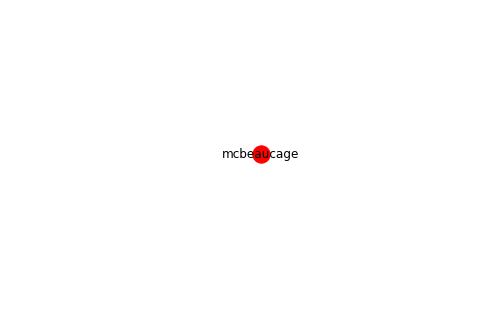

In [40]:
nx.draw(graph, with_labels=True)

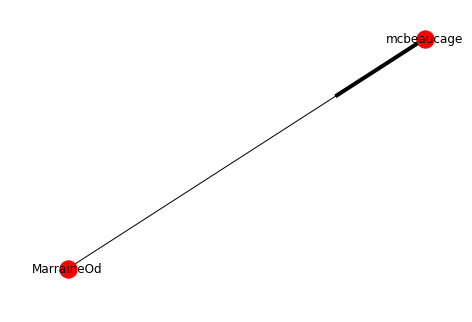

In [41]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

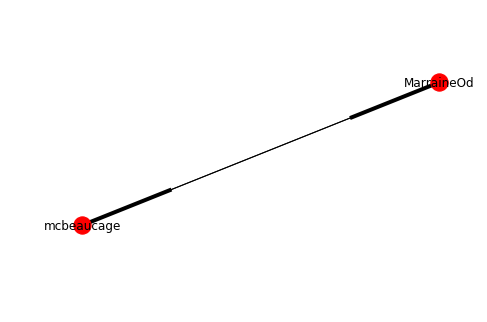

In [42]:
# Make link symmetric.
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [43]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                                {'screen_name': screen_name,
                                                 'count': 200})]
print('got %d tweets for user %s' % (len(timeline), screen_name))

got 200 tweets for user mcbeaucage


** Why not 200? **

In [44]:
# Print the text.
print('\n'.join(t['text'] for t in timeline))

J'ai décidé d'aller à Chicago parce que ces gars-là allaient enregistrer un de leurs podcasts… https://t.co/US5btFFKsy
@MartineMontreal @PodSaveAmerica En fait, c'est Tina Tchen. ;-) Mais oui!
À l'enregistrement de @PodSaveAmerica et viens de voir l'ancienne chief of staff de Michelle Obama. Oui je sais qui était sa chief of staff.
👋🏼@crookedmedia! À ce soir! https://t.co/IKMVNNRIzK
https://t.co/gUO1cGVwhh
RT @jaketapper: A) because it isn't. 
B) what you call "fake" = news you don't like
C) Committee busy investigating Russia and possible col…
Au revoir Anne Wiazemsky. Merci pour Une année studieuse et Un an après ; vous étiez plus qu'une… https://t.co/lJe0sVTvP6
J'aimerais dire à mon voisin au comptoir du resto que assise seule = pas que j'ai envie jaser. Mais je suis trop po… https://t.co/SMj0XyYMB6
RT @yashar: This CNN push alert https://t.co/2gcSQLkcqM
Michelle + Barack = 25 ans ❤️💛❤️💛photo de newyorkermag https://t.co/yuP3lWV5eD
Explication limpide du problème avec  les armes à f

In [45]:
from collections import Counter  # This is just a fancy dict mapping from object->int, starting at 0.
c = Counter()
c.update([1,2,1])
print(c)
c.update([1,'a',1])
print(c)

Counter({1: 2, 2: 1})
Counter({1: 4, 'a': 1, 2: 1})


In [48]:
#harish: ADM- FREQUENCY OF UNIQUE WORDS

In [49]:
# Count words
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())  # to lower case; split on whitespace.
print('found %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

found 1782 unique terms in 200 tweets


[('de', 96),
 ('rt', 46),
 ('à', 39),
 ('pas', 38),
 ('la', 38),
 ('le', 37),
 ('a', 37),
 ('un', 33),
 ('the', 33),
 ('et', 33)]

In [50]:
list(counts.keys())[0]

'charge'

In [51]:
sorted([5,4,-10,-1], key=lambda x: -x)

[5, 4, -1, -10]

In [52]:
sorted([('joe', 10), ('mary', 20), ('jim', 15), ('joe', 5)],
      key=lambda x: -x[1])

[('mary', 20), ('jim', 15), ('joe', 10), ('joe', 5)]

In [54]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

print('\n'.join('%s=%d' % (item[0], item[1]) 
                 for item in sorted_counts))

de=96
rt=46
à=39
pas=38
la=38
le=37
a=37
un=33
the=33
et=33
en=28
c'est=28
une=21
que=20
des=19
ce=19
to=18
du=18
pour=17
dans=15
ça=15
quand=15
je=15
il=15
on=15
j'ai=14
of=14
les=14
sur=14
mais=14
qui=13
est=13
si=12
is=11
trump=11
in=11
fait=10
son=10
and=10
avec=10
faut=9
au=8
as=8
@fournier_claude=8
même=8
you=7
this=7
are=7
have=7
plus=7
who=6
suis=6
#emmys=6
vous=6
for=6
i=6
that=6
spicer=6
aux=6
ne=6
vu=6
nous=6
-=5
my=5
by=5
wow.=5
n'est=5
+=5
at=5
not=5
se=5
saison=5
qu'elle=5
#emmys.=5
ses=5
elle=4
notre=4
us=4
sont=4
@antoinedeshaies=4
lire=4
with=4
we=4
vrai=4
dire=4
comme=4
i'm=4
nouvelle=4
mon=4
me=4
because=4
his=4
juste=4
been=4
cette=4
faire=4
ces=4
très=4
été=4
will=4
tout=4
win=3
oui,=3
from=3
numéro=3
@podsaveamerica=3
about=3
2=3
staff=3
trump.=3
sauf=3
black=3
trouve=3
ont=3
@aurelielanctot=3
encore=3
bien=3
qu'il=3
mois=3
never=3
petit=3
@hillaryclinton=3
it's=3
@a_l_e_x_p_a_r_e=3
those=3
chief=3
2e=3
==3
no=3
out=3
ils=3
an=3
moment=3
@rebeccamakonnen=3
speech=

In [56]:
#HARISH: ADM plot occureance of word in each news media

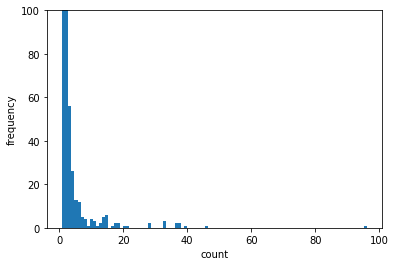

In [55]:
# Plot these counts.
import matplotlib.pyplot as plt
plt.hist(list(counts.values()), bins=100)
plt.xlabel('count')
plt.ylabel('frequency')
plt.ylim((0,100))
plt.show()

In [57]:
#harish:

**Zipf's Law**: (roughly) there are many rare words; there are a small number of extremely frequent words.

Alternatively:   
The frequency of a term is inversely proportional to its rank.

Let $f_i$ be the frequency of the $i$th most common term.

$ f_i \propto \frac{1}{i} $ 

equivalently

$ f_i = k$ $i^b $ for constant $k$ and $b=-1$

In [58]:
freqs = sorted(counts.values(), reverse=True)
freqs[:10]

[96, 46, 39, 38, 38, 37, 37, 33, 33, 33]

In [59]:
ranks = list(range(1, len(freqs)+1))

In [60]:
# Minimize mean squared error to find best value of k
from scipy.optimize import curve_fit
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

In [61]:
# Define the Zipf function and fit the k parameter.
def zipfs(i, k):
    return k / i
zipf_parms,covar = curve_fit(zipfs, ranks, freqs)
print('Zipf fit is %.2f*T^-1' % zipf_parms[0])

Zipf fit is 124.21*T^-1


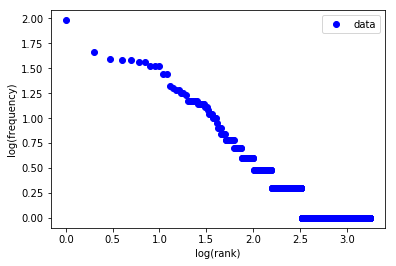

In [62]:
# Try a log-log plot.
import numpy as np
l_ranks = np.log10(ranks)
l_freqs = np.log10(freqs)
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.legend(loc='best')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')

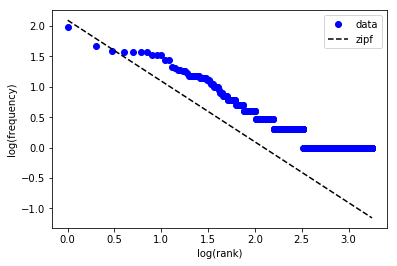

In [63]:
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(l_ranks, np.log10(zipfs(ranks, *zipf_parms)), 'k--', label='zipf')  # k-- = black dashed line
plt.legend(loc='best')